<a href="https://colab.research.google.com/github/marcinwolter/MyRepo/blob/master/cov_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARS-Covid-19 w Polsce
# by WB, 18.03.2020 22:35

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Dane z https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Poland

In [0]:
# PL
pol= [1, 1, 5, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749]

In [0]:
# IT
#pol = [20, 79, 150, 227, 320, 445, 650, 888, 1128, 1694, 2036, 2502, 
#  3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 
#  21157, 24747, 27980, 31506, 35713]

In [0]:
dz= [i for i in range(0,len(pol)) ]

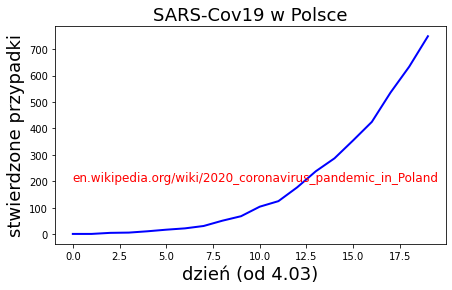

In [5]:
fig=plt.figure(figsize=(7,4))
plt.plot(pol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.text(x=0,y=200,s='en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Poland',fontsize=12, color='red')
plt.show()
fig.savefig("raw.jpg",bbox_inches="tight");

## W skali logarytmicznej wzrost przyhamowuje

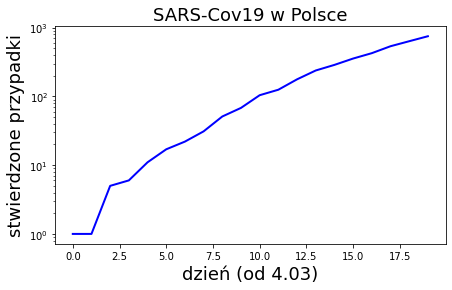

In [6]:
fig=plt.figure(figsize=(7,4))
plt.plot(pol, color='blue', lw=2)
plt.yscale('log')
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.show()
fig.savefig("log.jpg",bbox_inches="tight");

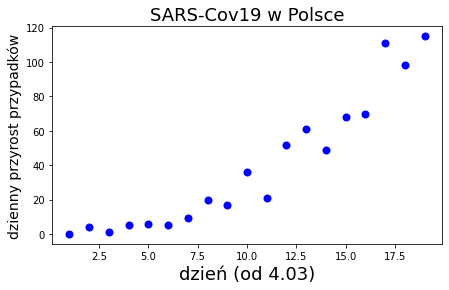

In [7]:
dpol=[pol[i+1]-pol[i] for i in range(0,len(pol)-1) ]
day= [i+1 for i in range(0,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day, dpol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('dzienny przyrost przypadków',fontsize=14)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.show()
fig.savefig("przyrost.jpg",bbox_inches="tight");

## Czynnik przyrostu to iloraz liczby przypadków w danym dniu do liczby przypadków w dniu poprzednim

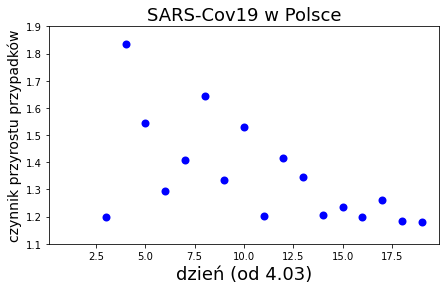

In [8]:
fpol=[pol[i+1]/pol[i] for i in range(0,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day, fpol, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('czynnik przyrostu przypadków',fontsize=14)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.ylim(1.1,1.9)
plt.show()
fig.savefig("czynnik.jpg",bbox_inches="tight");

## Czas (w dniach), po jakim liczba przypadków się podwaja

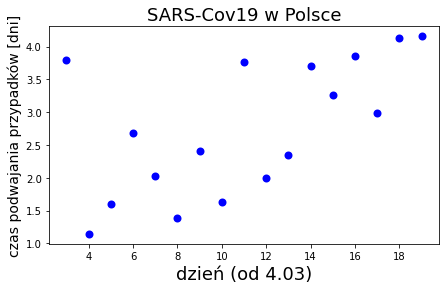

In [9]:
cza=[1./(np.log(fpol)[i]/np.log(2)) for i in range(2,len(fpol))]
day2= [i+1 for i in range(2,len(pol)-1) ]

fig=plt.figure(figsize=(7,4))
plt.scatter(day2, cza, color='blue', lw=2)
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('czas podwajania przypadków [dni]',fontsize=14)
plt.title('SARS-Cov19 w Polsce',fontsize=18)
plt.show()
fig.savefig("czas.jpg",bbox_inches="tight");

In [0]:
def fu(t, N, k, t0):
     return N/(1+ np.exp(-k*k *(t-t0*t0)))

In [11]:
popt, pcov = curve_fit(fu, dz, pol, p0=(30000, -0.5, -0.5), bounds=((30, -1,-10), (90000., 1.,10)))
# , bounds=((30000, -3,-50), (90000., 3.,50))
popt

array([ 1.36808374e+03,  5.51648848e-01, -4.29407968e+00])

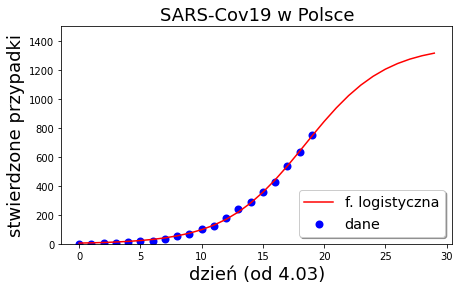

In [16]:
fig=plt.figure(figsize=(7,4))
# plt.yscale('log')

plt.scatter(dz, pol, color='blue', lw=2,label='dane')
plt.xlabel('dzień (od 4.03)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 w Polsce',fontsize=18)

ra=[i for i in range(0,30)]

plt.plot(ra, fu(ra, *popt),'r-',label='f. logistyczna')
plt.legend(loc='lower right', shadow=True, fontsize='x-large')

x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,1500))

plt.show()
fig.savefig("fit_PL.jpg",bbox_inches="tight");


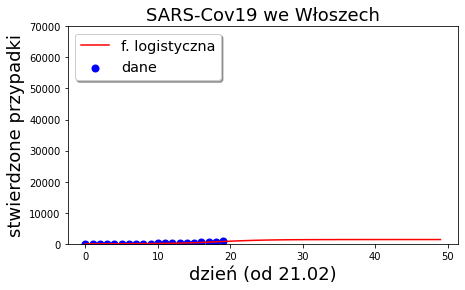

In [13]:
fig=plt.figure(figsize=(7,4))
# plt.yscale('log')

plt.scatter(dz, pol, color='blue', lw=2,label='dane')
plt.xlabel('dzień (od 21.02)',fontsize=18)
plt.ylabel('stwierdzone przypadki',fontsize=18)
plt.title('SARS-Cov19 we Włoszech',fontsize=18)

ra=[i for i in range(0,50)]

plt.plot(ra, fu(ra, *popt),'r-',label='f. logistyczna')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,70000))

plt.show()
fig.savefig("fit_IT.jpg",bbox_inches="tight");
